In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sn
import pandas as pd
import math
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline


# Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
r=input()
data = yf.download(r, start="2012-01-01", end="2017-08-01")
t=pd.DataFrame(data)
t.drop('Close',axis=1,inplace=True)
t=t[['Open','High','Low','Volume','Adj Close']]
t['OC_Change']=(t['Adj Close']-t['Open'])
t['HL_Change']=(t['High']-t['Low'])
#t=t[['Close','HL_Change','OC_Change','Volume']]
fc='Close'
fo=int(math.ceil(0.01*len(t)))
t.dropna(inplace=True)

t['target']=0
t.tail()

/Users/apple/anaconda/lib/python3.6/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and no longer available.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


GOOG
[*********************100%***********************]  1 of 1 downloaded

,Open,High,Low,Volume,Adj Close,OC_Change,HL_Change,target
Date,,,,,,,,
2017-07-25,953.809998,959.700012,945.400024,4661000,950.700012,-3.109986,14.299988,0
2017-07-26,954.679993,955.000000,942.278992,2088300,947.799988,-6.880005,12.721008,0
2017-07-27,951.780029,951.780029,920.000000,3213000,934.090027,-17.690002,31.780029,0
2017-07-28,929.400024,943.830017,927.500000,1846400,941.530029,12.130005,16.330017,0
2017-07-31,941.890015,943.590027,926.039978,1970100,930.500000,-11.390015,17.550049,0


#Exploratory Data Analysis 
##1.Quality of the Data
##2.Quality of Data Collection Method
#3. outliers within the dataset

In [3]:
t.columns

Index(['Open', 'High', 'Low', 'Volume', 'Adj Close', 'OC_Change', 'HL_Change',
       'target'],
      dtype='object')

In [4]:
t.columns= ['Open', 'High', 'Low', 'Volume', 'AdjClose', 'OC_Change', 'HL_Change',
       'target']

In [5]:
t.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target
Date,,,,,,,,
2017-07-25,953.809998,959.700012,945.400024,4661000,950.700012,-3.109986,14.299988,0
2017-07-26,954.679993,955.000000,942.278992,2088300,947.799988,-6.880005,12.721008,0
2017-07-27,951.780029,951.780029,920.000000,3213000,934.090027,-17.690002,31.780029,0
2017-07-28,929.400024,943.830017,927.500000,1846400,941.530029,12.130005,16.330017,0
2017-07-31,941.890015,943.590027,926.039978,1970100,930.500000,-11.390015,17.550049,0


In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1403 entries, 2012-01-03 to 2017-07-31
Data columns (total 8 columns):
Open         1403 non-null float64
High         1403 non-null float64
Low          1403 non-null float64
Volume       1403 non-null int64
AdjClose     1403 non-null float64
OC_Change    1403 non-null float64
HL_Change    1403 non-null float64
target       1403 non-null int64
dtypes: float64(6), int64(2)
memory usage: 98.6 KB


# Any missing values

In [7]:
t.isnull().any().sum()

0

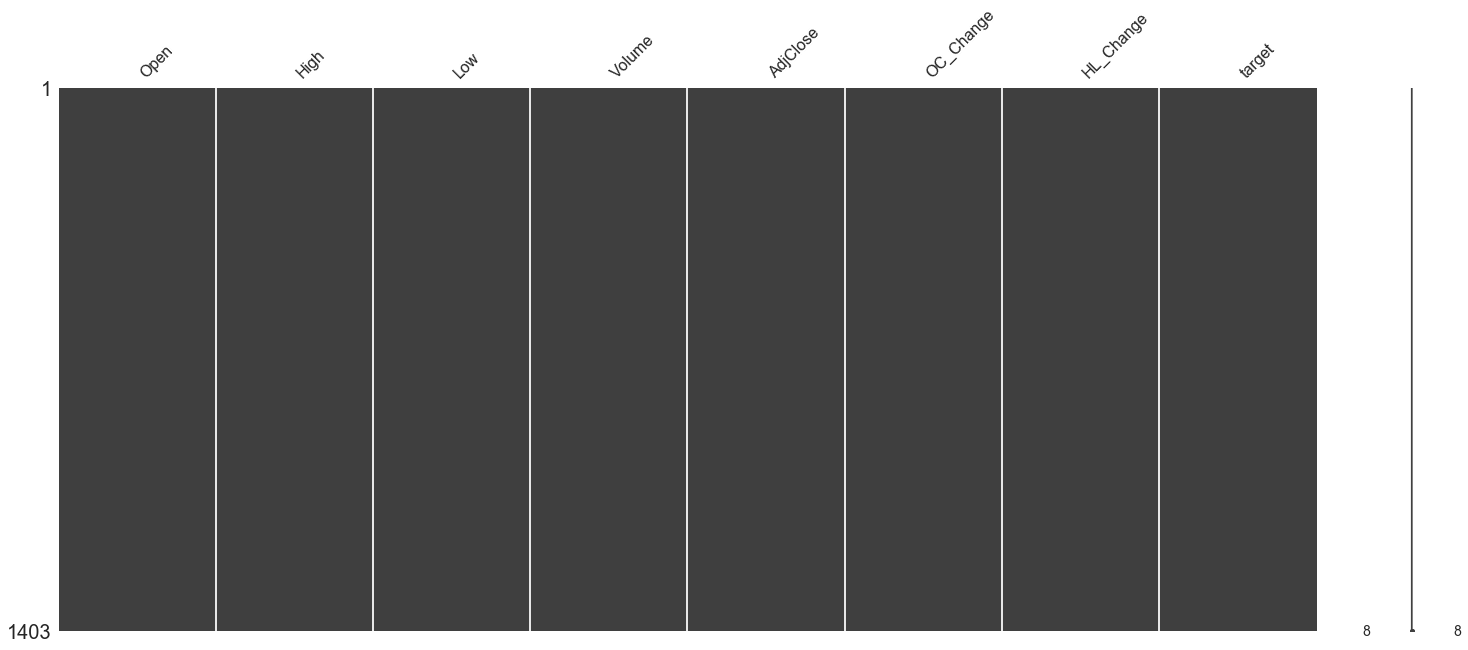

In [8]:
import missingno as msno
msno.matrix(t)

# interday stock movements

In [9]:
t["gain"] = t.apply( lambda x: ( x.AdjClose - x.Open ) * 100 / x.Open, axis = 1 )

In [10]:
t.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain
Date,,,,,,,,,
2017-07-25,953.809998,959.700012,945.400024,4661000,950.700012,-3.109986,14.299988,0,-0.326059
2017-07-26,954.679993,955.000000,942.278992,2088300,947.799988,-6.880005,12.721008,0,-0.720661
2017-07-27,951.780029,951.780029,920.000000,3213000,934.090027,-17.690002,31.780029,0,-1.858623
2017-07-28,929.400024,943.830017,927.500000,1846400,941.530029,12.130005,16.330017,0,1.305144
2017-07-31,941.890015,943.590027,926.039978,1970100,930.500000,-11.390015,17.550049,0,-1.209272


In [11]:
t.gain.std()

1.1010839866871254

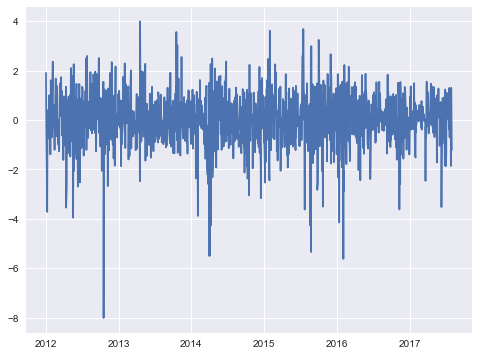

In [12]:
plt.figure( figsize = ( 8, 6 ))
plt.plot( t.gain )

#50% drop in price 

In [13]:
g = t[t.gain <= -0.49]
g

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain
Date,,,,,,,,,
2012-01-06,327.445282,327.867523,322.795532,5420700,322.909790,-4.535492,5.071991,0,-1.385114
2012-01-09,321.161163,321.409546,308.607819,11720900,309.218842,-11.942321,12.801727,0,-3.718482
2012-01-10,312.840271,314.852203,306.461761,8848200,309.556641,-3.283630,8.390442,0,-1.049619
2012-01-17,313.948059,313.948059,310.818420,3843300,312.259064,-1.688995,3.129639,0,-0.537985
2012-01-20,293.356995,293.590485,288.970520,21290100,291.101654,-2.255341,4.619965,0,-0.768804
2012-01-24,291.265594,291.941193,287.132477,6151200,288.588013,-2.677581,4.808716,0,-0.919292
2012-01-25,286.889069,287.485199,281.360016,10040200,282.904968,-3.984101,6.125183,0,-1.388725
2012-01-26,284.141937,285.383850,280.450928,6494300,282.214478,-1.927459,4.932922,0,-0.678344
2012-01-31,289.616333,290.113098,285.716675,4312500,288.180664,-1.435669,4.396423,0,-0.495714


# confidence interval & Calculate summary statisitcs on gain

In [14]:
from scipy import stats
ci = stats.norm.interval( 0.95,
                loc=t.gain.mean(),
                scale=t.gain.std())
ci

(-2.1680168237393227, 2.1481530919817695)

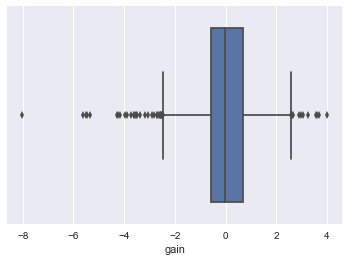

In [15]:
sn.boxplot(t.gain )

# Value at risk

In [16]:
invest_amt = 100000
appl_var = invest_amt * ci[0]
appl_var

-216801.68237393227

# Assigning he target value 

In [17]:
#t['target'][t['OC_Change']>0]=1
#t.drop(['HL_Change','OC_Change'],axis=1,inplace=True)
#for i in range(0,len(t)-1):
#    t['target'][i+1]=t['Close'][i+1]-t['Close'][i]

t['target']=t.AdjClose.diff()
t['target'][0]=0
t['targ']=0
t['targ'][t['target']>0]=1
t
#t.drop(['HL_Change','target'],axis=1,inplace=True)
t.head()


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ
Date,,,,,,,,,,
2012-01-03,324.360352,331.916199,324.077179,7400800,330.555054,6.194702,7.839020,0.000000,1.909821,0
2012-01-04,330.366272,332.959412,328.175537,5765200,331.980774,1.614502,4.783875,1.425720,0.488701,1
2012-01-05,328.925659,329.839722,325.994720,6608400,327.375732,-1.549927,3.845002,-4.605042,-0.471209,0
2012-01-06,327.445282,327.867523,322.795532,5420700,322.909790,-4.535492,5.071991,-4.465942,-1.385114,0
2012-01-09,321.161163,321.409546,308.607819,11720900,309.218842,-11.942321,12.801727,-13.690948,-3.718482,0


# Understanding distribution


/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


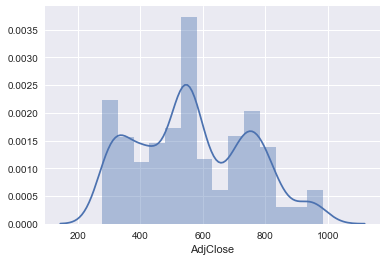

In [18]:
sn.distplot( t.AdjClose )

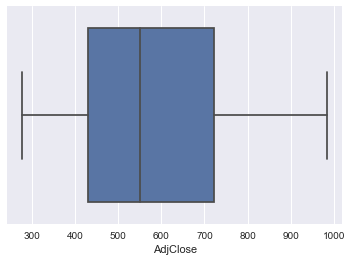

In [19]:
sn.boxplot(t.AdjClose )

# Transformation & Normalisation

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


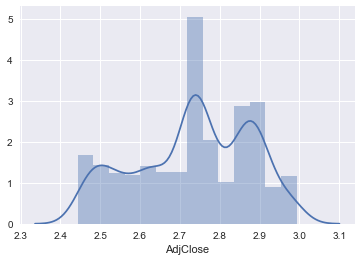

In [20]:
sn.distplot(np.log10(t.AdjClose ) )

In [21]:
t['log_close'] = np.log10(t.AdjClose )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


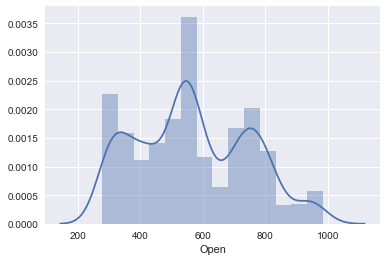

In [22]:
sn.distplot( t.Open )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


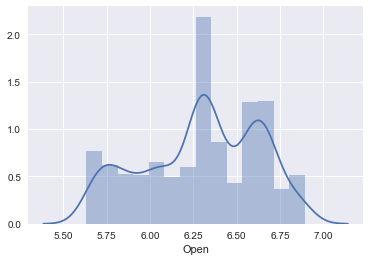

In [23]:
sn.distplot( np.log1p( t.Open ) )

# understanding different variables correlation

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


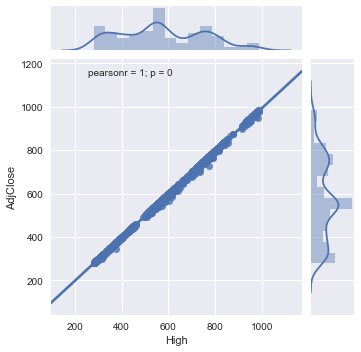

In [24]:
sn.jointplot(x="High", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


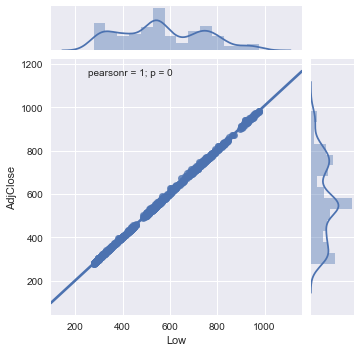

In [25]:
sn.jointplot(x="Low", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


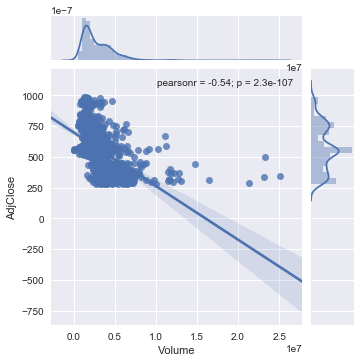

In [26]:
sn.jointplot(x="Volume", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


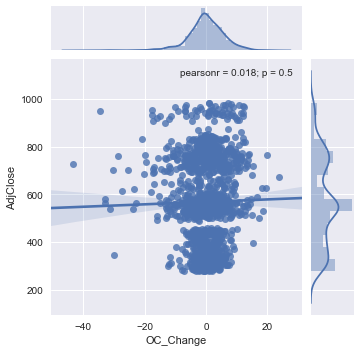

In [27]:
sn.jointplot(x="OC_Change", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


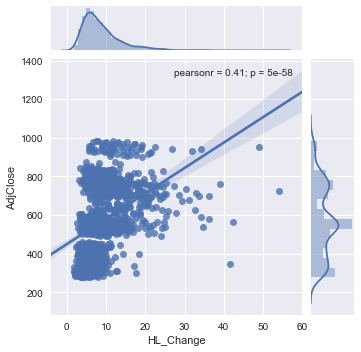

In [28]:
sn.jointplot(x="HL_Change", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


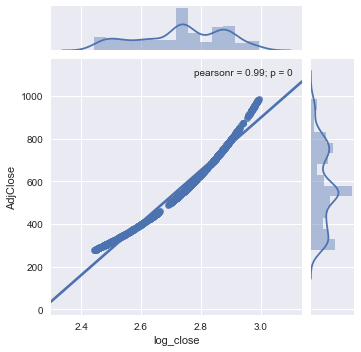

In [29]:
sn.jointplot(x="log_close", y="AdjClose", data=t, kind = 'reg', size = 5)

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


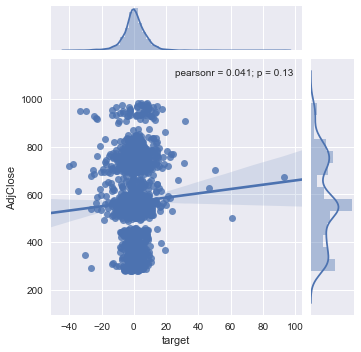

In [30]:
sn.jointplot(x="target", y="AdjClose", data=t, kind = 'reg', size = 5)

In [31]:
t.columns
vars1=['Open', 'High', 'Low', 'Volume', 'AdjClose', 'OC_Change', 'HL_Change', 'log_close','target','gain']

#Heat map

/Users/apple/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


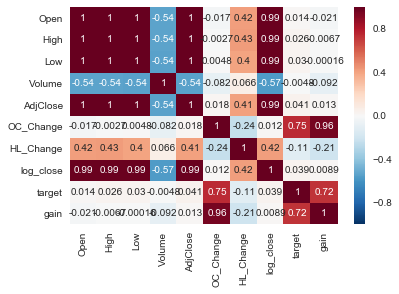

In [32]:
sn.heatmap( t[vars1].corr(), annot=True )

In [33]:
from scipy import stats

In [34]:
r, p = stats.pointbiserialr( t['Volume'],
                           t['AdjClose'])
print ('point biserial correlation r is %s with p = %s' %(r,p))

point biserial correlation r is -0.540765989982 with p = 2.28708700188e-107


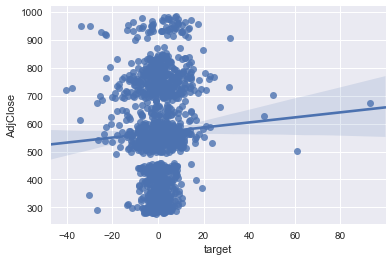

In [35]:
sn.regplot( t.target , t.AdjClose )

In [36]:
sn.set(font_scale=1.2,style="whitegrid") #set styling preferences

pc = t.sample(frac = .25) #read the dataset and sample 25% of it
pc.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2016-05-26,722.869995,728.330017,720.280029,1542900,724.119995,1.250000,8.049988,-1.150025,0.172922,0,2.859811
2015-09-22,627.000000,627.549988,615.429993,2562900,622.690002,-4.309998,12.119995,-12.750000,-0.687400,0,2.794272
2016-07-11,708.049988,716.510010,707.239990,1111800,715.090027,7.040039,9.270020,9.460022,0.994286,1,2.854361
2014-09-11,577.186340,578.628418,573.108765,1224400,578.170898,0.984558,5.519653,-1.740418,0.170579,0,2.762056
2014-02-19,598.755676,600.703003,594.880859,4234500,597.285217,-1.470459,5.822144,-4.242432,-0.245586,0,2.776182


In [37]:
x= t.replace([np.inf, -np.inf], np.nan) #convert infs to nans
x = t.dropna(axis = 1, how = 'any') #remove nans
x = t._get_numeric_data() #keep only numeric features
x.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2017-07-25,953.809998,959.700012,945.400024,4661000,950.700012,-3.109986,14.299988,-29.640015,-0.326059,0,2.978043
2017-07-26,954.679993,955.000000,942.278992,2088300,947.799988,-6.880005,12.721008,-2.900024,-0.720661,0,2.976717
2017-07-27,951.780029,951.780029,920.000000,3213000,934.090027,-17.690002,31.780029,-13.709961,-1.858623,0,2.970389
2017-07-28,929.400024,943.830017,927.500000,1846400,941.530029,12.130005,16.330017,7.440002,1.305144,1,2.973834
2017-07-31,941.890015,943.590027,926.039978,1970100,930.500000,-11.390015,17.550049,-11.030029,-1.209272,0,2.968716


In [38]:
xi = t.values #convert the data into a numpy array
xi = scale(x);
x.tail()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2017-07-25,953.809998,959.700012,945.400024,4661000,950.700012,-3.109986,14.299988,-29.640015,-0.326059,0,2.978043
2017-07-26,954.679993,955.000000,942.278992,2088300,947.799988,-6.880005,12.721008,-2.900024,-0.720661,0,2.976717
2017-07-27,951.780029,951.780029,920.000000,3213000,934.090027,-17.690002,31.780029,-13.709961,-1.858623,0,2.970389
2017-07-28,929.400024,943.830017,927.500000,1846400,941.530029,12.130005,16.330017,7.440002,1.305144,1,2.973834
2017-07-31,941.890015,943.590027,926.039978,1970100,930.500000,-11.390015,17.550049,-11.030029,-1.209272,0,2.968716


# Looking at targ diff

In [39]:
t.targ.value_counts()

1    728
0    675
Name: targ, dtype: int64

In [40]:
app_df = pd.DataFrame(t.targ.value_counts() )

In [41]:
app_df

,targ
1,728
0,675


In [42]:
app_df['nam_df'] = app_df.index
app_df

,targ,nam_df
1,728,1
0,675,0


/Users/apple/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


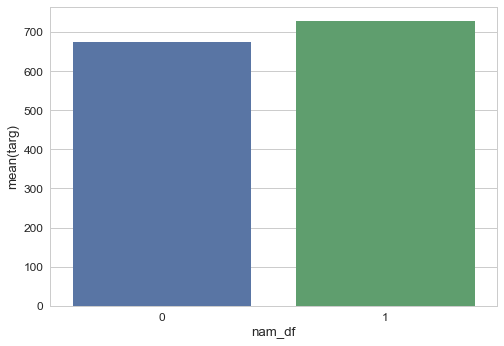

In [43]:
sn.barplot(  x = 'nam_df', y = 'targ', data = app_df  )

# Dimensionality  Reduction 

In [44]:
covar_matrix = PCA(n_components = 9) 

In [45]:
covar_matrix.fit(xi)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([  49.9,   79.1,   88.6,   93. ,   96.8,   99.4,   99.8,  100. ,
        100. ])

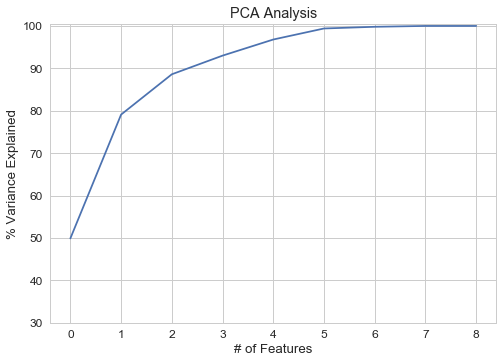

In [46]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

# Common Financial Analysis

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


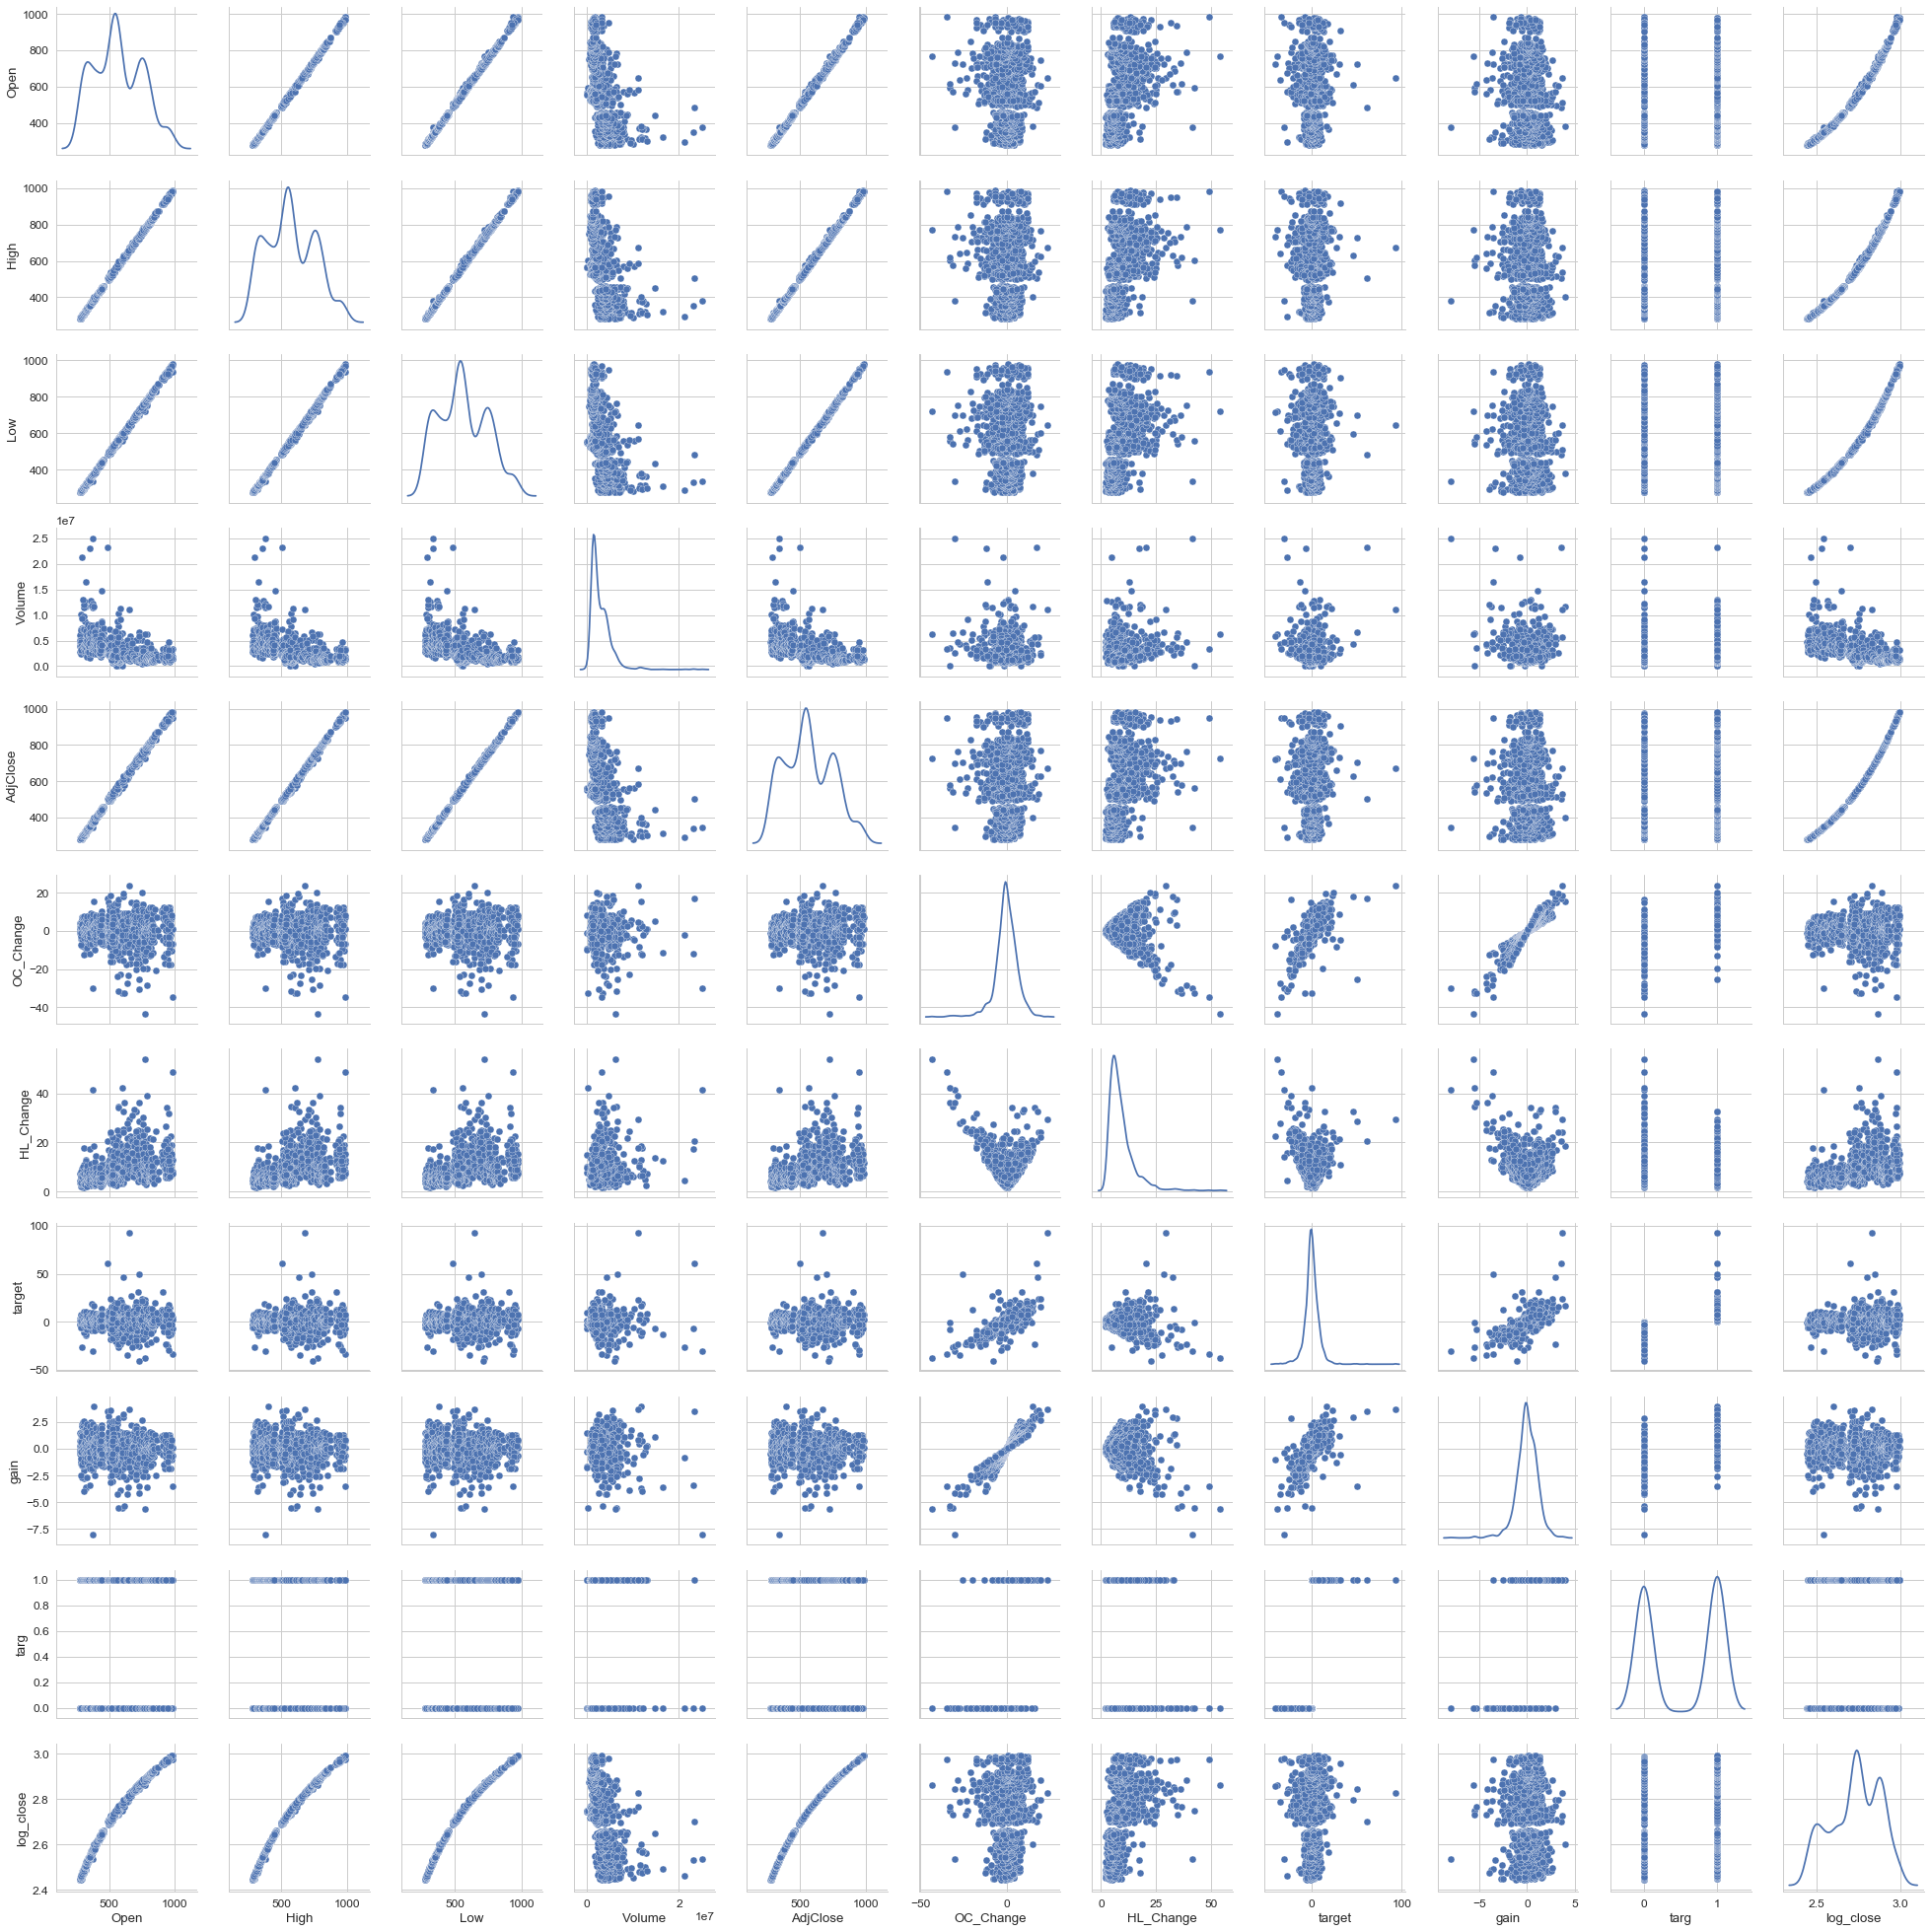

In [47]:
plot = sn.pairplot(x,diag_kind='kde')

# Time Series plot of close price

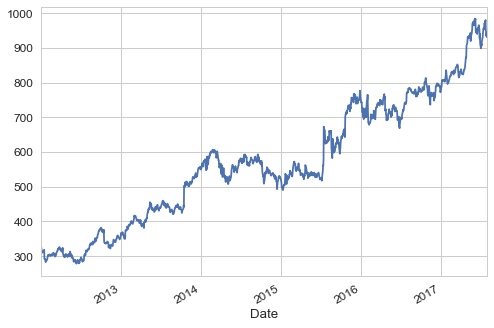

In [48]:
import matplotlib.pyplot as plt

t['AdjClose'].plot(grid=True)

plt.show()

# daily percentage change

In [49]:
import numpy as np

daily_close = t[['AdjClose']]

# Daily returns
daily_pct_change = daily_close.pct_change()

daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.tail())



            AdjClose
Date                
2017-07-25 -0.030234
2017-07-26 -0.003050
2017-07-27 -0.014465
2017-07-28  0.007965
2017-07-31 -0.011715


In [50]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns


daily_log_returns['AdjClose'][0]=0
print(daily_log_returns.tail())

            AdjClose
Date                
2017-07-25 -0.030701
2017-07-26 -0.003055
2017-07-27 -0.014571
2017-07-28  0.007933
2017-07-31 -0.011784


In [51]:
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_change`
print(daily_pct_change.tail())

            AdjClose
Date                
2017-07-25 -0.030234
2017-07-26 -0.003050
2017-07-27 -0.014465
2017-07-28  0.007965
2017-07-31 -0.011715


# distribution of daily_pct_change

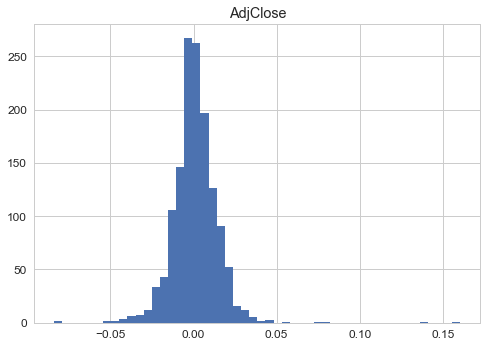

          AdjClose
count  1402.000000
mean      0.000839
std       0.014266
min      -0.083775
25%      -0.006083
50%       0.000430
75%       0.007964
max       0.160524


In [52]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_change.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_change.describe())

# calculate the daily percentage change and comparing the results with other stocks.

In [54]:
import pandas_datareader as pdr
import datetime
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2012, 1, 1), datetime.datetime(2017, 8, 1))



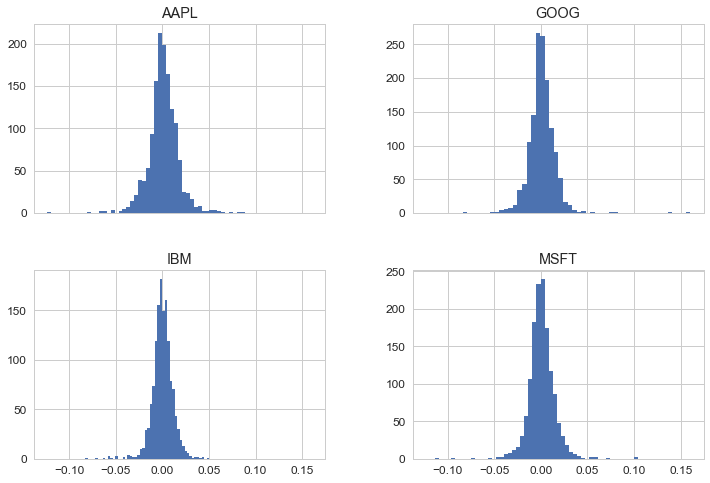

In [55]:
import matplotlib.pyplot as plt 

daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for 'daily_close_px'
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [56]:
daily_pct_change.tail()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2017-07-26,0.004714,-0.003050,-0.005678,-0.001887
2017-07-27,-0.018897,-0.014465,-0.001995,-0.012019
2017-07-28,-0.007040,0.007965,-0.005377,-0.001640
2017-07-31,-0.005150,-0.011715,0.002634,-0.004655
2017-08-01,0.008875,0.000355,0.004355,-0.001650


/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """


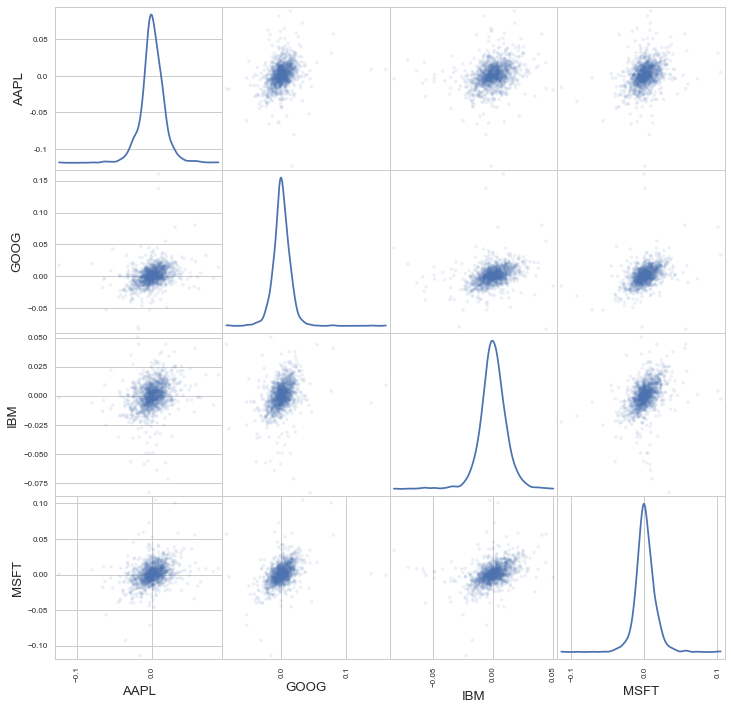

In [57]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot a scatter matrix with the `daily_pct_change` data 
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [58]:
t.head()

,Open,High,Low,Volume,AdjClose,OC_Change,HL_Change,target,gain,targ,log_close
Date,,,,,,,,,,,
2012-01-03,324.360352,331.916199,324.077179,7400800,330.555054,6.194702,7.839020,0.000000,1.909821,0,2.519244
2012-01-04,330.366272,332.959412,328.175537,5765200,331.980774,1.614502,4.783875,1.425720,0.488701,1,2.521113
2012-01-05,328.925659,329.839722,325.994720,6608400,327.375732,-1.549927,3.845002,-4.605042,-0.471209,0,2.515046
2012-01-06,327.445282,327.867523,322.795532,5420700,322.909790,-4.535492,5.071991,-4.465942,-1.385114,0,2.509081
2012-01-09,321.161163,321.409546,308.607819,11720900,309.218842,-11.942321,12.801727,-13.690948,-3.718482,0,2.490266


In [59]:
t.drop(['HL_Change','target'],axis=1,inplace=True)

In [60]:
t.head()

,Open,High,Low,Volume,AdjClose,OC_Change,gain,targ,log_close
Date,,,,,,,,,
2012-01-03,324.360352,331.916199,324.077179,7400800,330.555054,6.194702,1.909821,0,2.519244
2012-01-04,330.366272,332.959412,328.175537,5765200,331.980774,1.614502,0.488701,1,2.521113
2012-01-05,328.925659,329.839722,325.994720,6608400,327.375732,-1.549927,-0.471209,0,2.515046
2012-01-06,327.445282,327.867523,322.795532,5420700,322.909790,-4.535492,-1.385114,0,2.509081
2012-01-09,321.161163,321.409546,308.607819,11720900,309.218842,-11.942321,-3.718482,0,2.490266


# Models

In [61]:
X = t.iloc[:,0:8].values
y = t.iloc[:, 8].values
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
linreg = LinearRegression( normalize=True )
linreg.fit( X_train,y_train)
list( zip(t.columns,
        np.round( linreg.coef_, 2 ) ) )

/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[('Open', 0.0),
 ('High', 0.0),
 ('Low', -0.0),
 ('Volume', -0.0),
 ('AdjClose', 0.0),
 ('OC_Change', 0.0),
 ('gain', 0.0),
 ('targ', -0.0)]

In [62]:
def model_evaluate( model_ ):
  pred_df = pd.DataFrame( { "actual": y_test, "predicted" : model_.predict( X_test ) } )
  pred_df['resid'] = pred_df.actual - pred_df.predicted
  rmse = np.sqrt( metrics.mean_squared_error( pred_df.actual, pred_df.predicted ) )
  r2 = metrics.r2_score( pred_df.actual, pred_df.predicted )
  print( "RMSE: ", rmse, " : ", "R Squared: ", r2 )
  return pred_df, rmse, r2

In [63]:
pred_df, rmse, r2 = model_evaluate( linreg )

RMSE:  0.0227139797064  :  R Squared:  0.974885951981


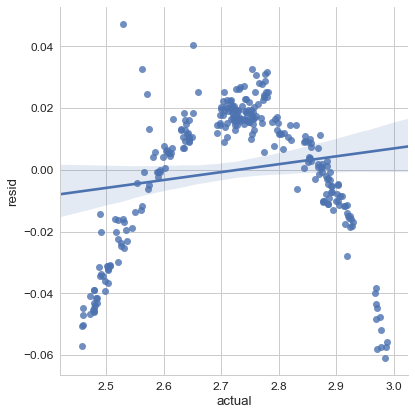

In [64]:
sn.lmplot( 'actual', 'resid', data = pred_df, size = 6 )

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


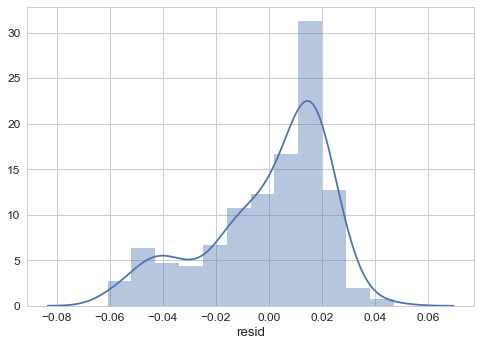

In [65]:
sn.distplot( pred_df.resid )

/Users/apple/anaconda/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:


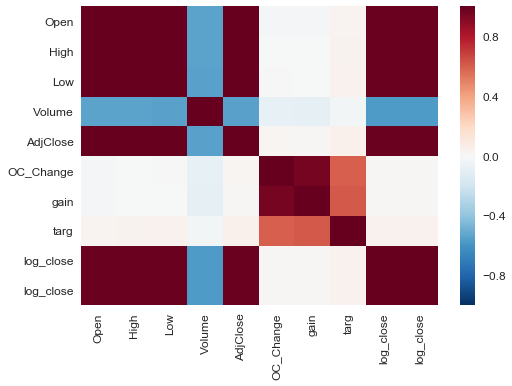

In [66]:
sn.heatmap( pd.concat( [t, t.log_close], axis = 1 ).corr() )

In [67]:
pred_df[0:5]

,actual,predicted,resid
0,2.751875,2.732568,0.019307
1,2.602597,2.601966,0.000631
2,2.520911,2.550718,-0.029807
3,2.741050,2.724956,0.016094
4,2.885497,2.896474,-0.010977


# SVM 

In [68]:
X = t.iloc[:,0:7].values
y = t.iloc[:, 7].values
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

cl=SVC(kernel='poly',random_state=0) 
cl.fit(X_train, y_train)

# Predicting the Test set results
y_pred = cl.predict(X_test)
pp=cl.score(X_train,y_train)
print(pp*100)


51.3368983957


/Users/apple/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [69]:
l_svm_cm = metrics.confusion_matrix( y_test, y_pred )
l_svm_cm

array([[  0, 129],
       [  0, 152]])

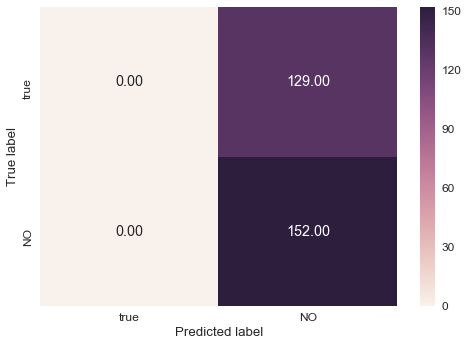

In [70]:
sn.heatmap(l_svm_cm, annot=True,  fmt='.2f', xticklabels = ["true", "NO"] , yticklabels = ["true", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

TypeError: 'property' object is not subscriptable

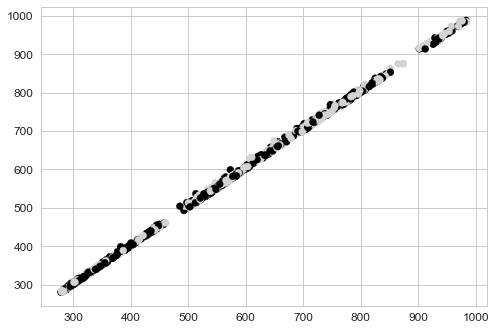

In [71]:
# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = SVC.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

# DecisionTree

In [72]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())
    

/Users/apple/anaconda/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


0.798277608916


In [73]:
depths_list = [2,3,4,5,6]

for depth in depths_list:
    clf_tree = DecisionTreeClassifier( max_depth = depth )
    clf_tree.fit(X,y )
    print( "Tree Depth: ",
          depth,
          " - Accuracy: ",
          metrics.accuracy_score(y, clf_tree.predict(X ) ) )


Tree Depth:  2  - Accuracy:  0.831789023521
Tree Depth:  3  - Accuracy:  0.831789023521
Tree Depth:  4  - Accuracy:  0.841054882395
Tree Depth:  5  - Accuracy:  0.852459016393
Tree Depth:  6  - Accuracy:  0.872416250891


In [74]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )

In [75]:
clf_tree.fit(X,y )
tree_predict = clf_tree.predict(X )
metrics.accuracy_score(y, tree_predict )

0.84105488239486814

In [76]:
tree_cm = metrics.confusion_matrix(y, tree_predict )

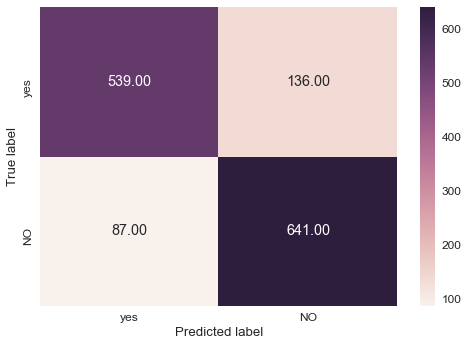

In [77]:
sn.heatmap(tree_cm, annot=True,  fmt='.2f', xticklabels = ["yes", "NO"] , yticklabels = ["yes", "NO"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [78]:
from sklearn import tree
tree.export_graphviz( clf_tree,
                out_file = "yes_tree.odt",
                feature_names = X )

In [79]:
import pydotplus as pdot

chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'yes_tree.odt' )


In [80]:
chd_tree_graph.write_jpg( 'yes_tree.jpg' )

True

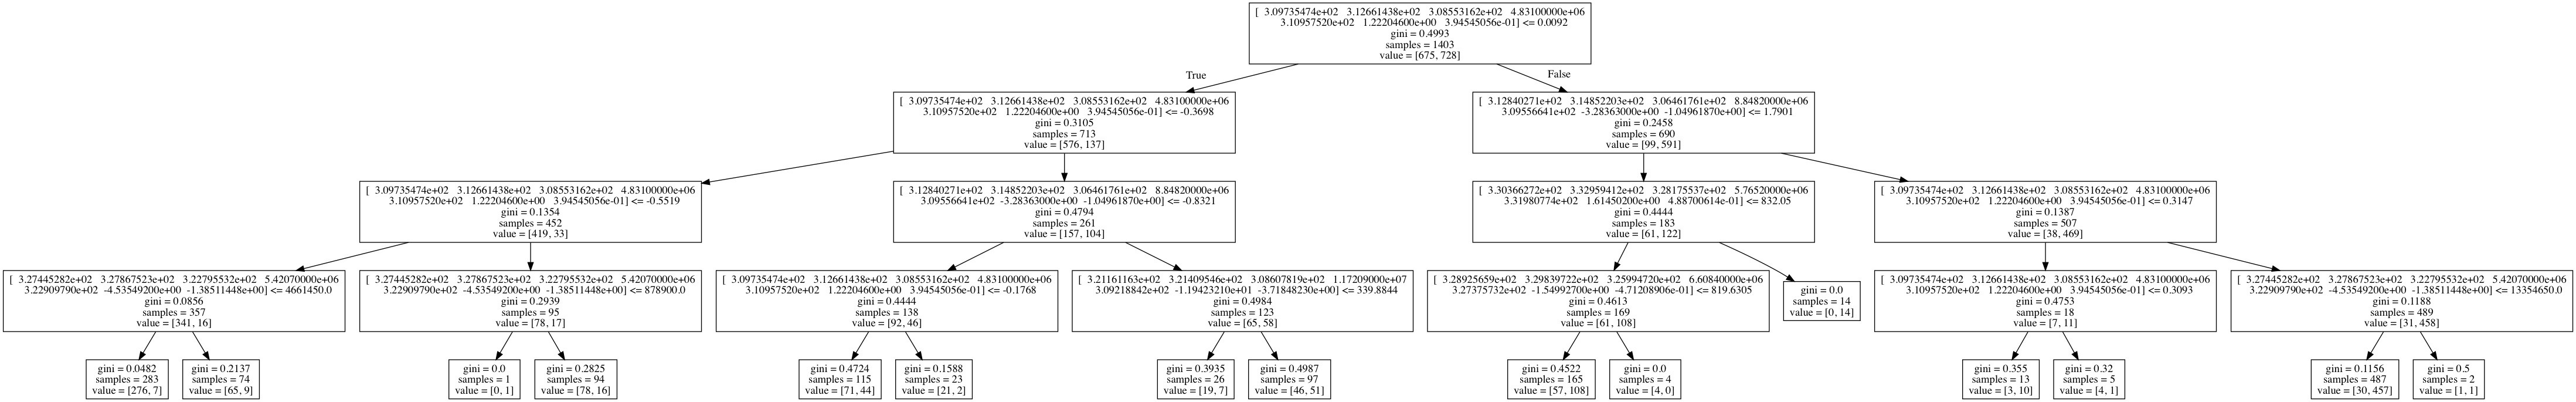

In [81]:
from IPython.display import Image
Image(filename='yes_tree.jpg')

In [82]:
gini_left_split = 1 - pow(245/763, 2) - pow (518/763, 2)
gini_left_split

0.4359902365120781

In [83]:
gini_node_1 = 1 - pow(677/1403, 2) - pow (726/677, 2)
print( gini_node_1 )

-0.38283723420020754


In [84]:
gini_right_split = 1 - pow(432/640, 2) - pow (208/640, 2)
gini_right_split

0.4387499999999999

In [85]:
info_gain = gini_node_1 - (432/640)*gini_left_split - (208/640)*gini_right_split
info_gain

-0.8197243938458602

# RandomForest

In [86]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.804716312057


#Validation ROC 

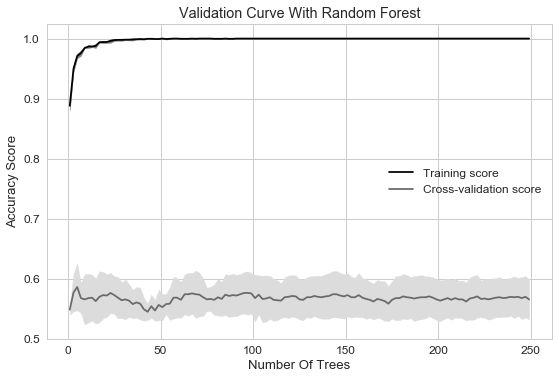

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Boosting Algorithim 

In [87]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.770592705167


In [88]:
from sklearn.metrics import roc_auc_score
sklearn.metrics.roc_auc_score(X, y, average='macro', sample_weight=None)

NameError: name 'sklearn' is not defined

#Model Validation boosting roc

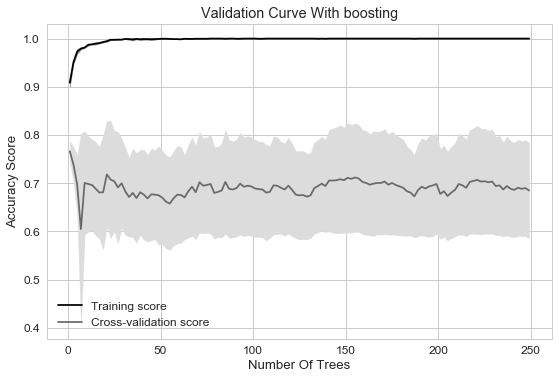

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
# Create range of values for parameter
param_range = np.arange(1, 250, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With boosting")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# GradientBoosting

In [89]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.798323201621


# Stacking Algorithim 

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.786200607903


# Linear Regression OLS

In [91]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
r=t
model.summary()

/Users/apple/anaconda/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     415.7
Date:                Thu, 05 Oct 2017   Prob (F-statistic):          2.27e-280
Time:                        01:48:41   Log-Likelihood:                -559.35
No. Observations:                1122   AIC:                             1131.
Df Residuals:                    1116   BIC:                             1161.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013      0.005      0.296      0.767      -0.008       0.010
x2            -0.0031      0.005     -0.617      0.538      -0.013       0.007
x3            -0.0009      0.004     -0.198      0.843      -0.010       0.008
x4          4.327e-08   4.56e-09      9.497      0.000    3.43e-08    5.22e-08
x5             0.0033      0.004      0.730      0.465      -0.006       0.012
x6             0.0019      0.004      0.449      0.653      -0.006       0.010
x7             0.2618      0.037      7.142      0.000       0.190       0.334
==============================================================================
Omnibus:                       48.316   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.335
Skew:                          -0.139   Prob(JB):                     8.57e-06
Kurtosis:                       2.351   Cond. No.                     2.99e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Model Validation

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
t_x = t
vif["vif factor"] = [variance_inflation_factor(r.values, i) for i in range(t_x.shape[1])]

vif["features"] = t_x.columns
vif

/Users/apple/anaconda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif factor,features
0,inf,Open
1,5.859780e+04,High
2,4.860330e+04,Low
3,4.596106e+00,Volume
4,inf,AdjClose
5,inf,OC_Change
6,1.250454e+01,gain
7,3.396230e+00,targ
8,3.723970e+01,log_close


In [93]:
predictions[0:10]

array([ 0.32551558,  0.17345843,  0.22099868,  0.80985731,  0.86910278,
        0.5906254 ,  0.46452409,  0.02491709,  0.09677078,  0.65593547])

In [94]:
from statsmodels.tools.eval_measures import rmse
rmse( y_test, predictions )

0.39563880949040725

# Neural Net Algorithim 

In [95]:
t.keys()

Index(['Open', 'High', 'Low', 'Volume', 'AdjClose', 'OC_Change', 'gain',
       'targ', 'log_close'],
      dtype='object')

In [96]:
y = t['targ']
X = t.drop(['targ'],axis=1)


In [97]:
X.head()


,Open,High,Low,Volume,AdjClose,OC_Change,gain,log_close
Date,,,,,,,,
2012-01-03,324.360352,331.916199,324.077179,7400800,330.555054,6.194702,1.909821,2.519244
2012-01-04,330.366272,332.959412,328.175537,5765200,331.980774,1.614502,0.488701,2.521113
2012-01-05,328.925659,329.839722,325.994720,6608400,327.375732,-1.549927,-0.471209,2.515046
2012-01-06,327.445282,327.867523,322.795532,5420700,322.909790,-4.535492,-1.385114,2.509081
2012-01-09,321.161163,321.409546,308.607819,11720900,309.218842,-11.942321,-3.718482,2.490266


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5))

In [102]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [103]:
predictions = mlp.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1,

In [104]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[118  30]
 [ 45 158]]


#Model Validation

In [105]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.80      0.76       148
          1       0.84      0.78      0.81       203

avg / total       0.79      0.79      0.79       351



In [106]:
len(mlp.coefs_)
len(mlp.intercepts_[0])

5

In [107]:
len(mlp.coefs_)

4

In [110]:
print(mlp.coefs_)

[array([[ 0.25113211,  0.23895259, -0.57478859, -0.01689945,  0.03223546],
       [ 0.67564392,  0.29001933, -0.60024796, -0.50051712,  0.31324392],
       [ 0.33799137,  0.19741928,  0.25643633,  0.62574658, -0.42154365],
       [-0.37316457, -0.32727066,  0.23901609, -0.50080064,  0.17456775],
       [ 0.35350346,  0.2410675 ,  0.4157737 ,  0.68701337, -0.46893027],
       [ 0.52268552,  0.6322206 ,  0.74992628,  0.13151975, -0.71638837],
       [-0.52148895,  0.99266764,  1.10782318, -0.17205385,  0.22910362],
       [ 0.05387658,  0.03070751,  0.36827451,  0.72301948,  0.30757408]]), array([[-0.05531353, -0.90409124, -0.70544562,  0.57808276,  0.02613661],
       [ 0.22533568, -0.30406568,  0.34853871,  0.04746966, -0.40048654],
       [ 0.98667132, -0.47016865, -0.23668626,  0.22576133, -0.7115648 ],
       [ 0.39691624,  0.56225249,  0.01913158,  0.3033488 ,  0.6462689 ],
       [-0.07575161, -0.39744048, -0.71562653, -0.13605756,  0.92800615]]), array([[ 0.06167003,  0.91958547,

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
X = t.iloc[:,0:9].values
y = t.iloc[:, 9].values
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Using TensorFlow backend.


NameError: name 't' is not defined

In [151]:
X = t.iloc[:,0:7].values
y = t.iloc[:, 7].values

In [152]:
cl=Sequential()
cl.add(Dense(output_dim=7,init='uniform',activation='relu',input_dim=3))
cl.add(Dense(output_dim=4,init='uniform',activation='relu'))
cl.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
cl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3, units=7, kernel_initializer="uniform")`
  
/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=4, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/apple/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [157]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset

# split into input (X) and output (Y) variables
X = t.iloc[:,0:7].values
y = t.iloc[:, 7].values
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


NameError: name 'Y' is not defined

ValueError: Error when checking input: expected dense_49_input to have shape (None, 8) but got array with shape (1403, 7)

In [112]:
y_pred=cl.predict(X_test)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0
y_pred

ValueError: Error when checking : expected dense_4_input to have shape (None, 3) but got array with shape (351, 8)

In [113]:
t.Close[0:100]

AttributeError: 'DataFrame' object has no attribute 'Close'

In [114]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

ValueError: Found input variables with inconsistent numbers of samples: [351, 281]

In [133]:
X = t.iloc[:,0:7].values
y = t.iloc[:, 7].values